In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

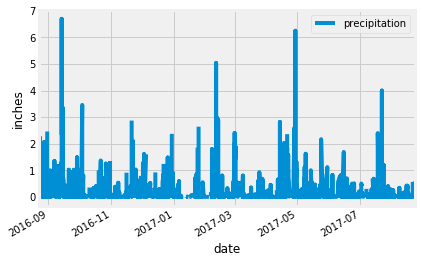

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

pre_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
pre_data
pre_data=pre_data[0]
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
year_ago = dt.datetime.strptime(pre_data, "%Y-%m-%d") - dt.timedelta(days=366)

# Save the query results as a Pandas DataFrame and set the index to the date column
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

prec_df = pd.DataFrame(query,columns=['date', 'precipitation'])
prec_df['date'] = pd.to_datetime(prec_df['date'], format='%Y-%m-%d')


# set the index to the date 
prec_df.set_index('date', inplace=True)
# Sort the dataframe by date
prec_df = prec_df.sort_values(by='date',ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data

plotted = prec_df.plot()
plotted.set_ylabel("inches")
plt.savefig
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?

avai_sta = session.query(Measurement.station).distinct().count()
print(f"Stations Available: {avai_sta} ")

Stations Available: 9 


In [13]:
# What are the most active stations? 
# List the stations and the counts in descending order.

act_stat = session.query(Measurement.station, 
        func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Most Active Stations")
act_stat


Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
#(i.e. what stations have the most rows)?

most_act_stat=act_stat[0][0]
print(f"Most Active Station: {most_act_stat}")

Most Active Station: USC00519281


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_temp_stat= session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_temp_stat= most_temp_stat[0]


most_act_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_act_stat).all()
print(f"Most Active Station Temperatures")
print(f"Low: {most_act_temps[0][0]} High: {most_act_temps[0][1]} Average: {round(most_act_temps[0][2], 1)}")


Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


In [16]:
# Choose the station with the highest number of temperature observations.
temp_observations = session.query( Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == most_temp_stat).all()
temp_observations = pd.DataFrame(temp_observations, columns=['temperature'])
temp_observations

,temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


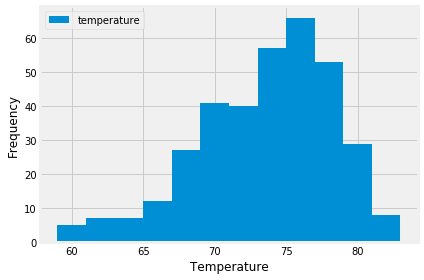

In [17]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plotted = temp_observations.plot.hist(bins=12)
plotted.set_xlabel("Temperature")
plt.tight_layout()
plt.savefig
plt.show()

## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)


In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
